In [59]:
# https://stackoverflow.com/questions/53417976/import-data-from-shared-google-drive-into-google-colaboratory
# Follow above
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Hypothesis:
1. The older, the higher the probability to get lung cancer
2. Higher BMI(using height and weight) will increase the incidence of cancer
2. Smoking will increase the incidence of cancer
3. treatment will help reduce mortality.

In [60]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder

import csv
from pprint import pprint
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('/content/drive/MyDrive/ML1 final project group 9/Data/train.csv')
df

,No,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,TX,T0,T1,T1a,T1b,...,Height,Weight,FEV1_FVC_P,DLCO_VA_P,EGFR mutation Detection,Operation,Chemotherapy,Radiation Therapy,Death,Survival period
0,0,72,1,1,0,1,0,0,0,1,...,142.0,68.2,87,102,99,1,0,0,0,157
1,1,66,1,0,0,0,0,1,0,0,...,179.4,61.1,54,112,99,0,1,0,0,567
2,2,75,1,1,0,1,0,0,0,0,...,169.8,73.8,79,73,99,0,1,0,0,253
3,3,77,1,0,1,0,0,1,0,1,...,158.5,79.1,78,137,1,0,0,0,0,266
4,4,85,1,0,0,0,0,0,0,0,...,172.3,44.3,48,85,99,1,0,1,0,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,69,1,0,0,0,0,0,0,1,...,161.5,70.4,70,105,0,0,1,0,1,522
9996,9996,37,0,0,0,0,0,0,1,0,...,165.7,85.0,79,129,0,1,1,0,0,107
9997,9997,31,1,0,0,0,0,0,1,0,...,151.5,61.3,69,123,99,0,0,1,0,66
9998,9998,85,0,0,0,0,0,0,0,0,...,159.5,54.3,84,68,1,1,1,0,0,156


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   No                       10000 non-null  int64  
 1   AGE                      10000 non-null  int64  
 2   Adenocarcinoma           10000 non-null  int64  
 3   Large cell carcinoma     10000 non-null  int64  
 4   Squamous cell carcinoma  10000 non-null  int64  
 5   TX                       10000 non-null  int64  
 6   T0                       10000 non-null  int64  
 7   T1                       10000 non-null  int64  
 8   T1a                      10000 non-null  int64  
 9   T1b                      10000 non-null  int64  
 10  T1c                      10000 non-null  int64  
 11  T2                       10000 non-null  int64  
 12  T2a                      10000 non-null  int64  
 13  T2b                      10000 non-null  int64  
 14  T3                     

In [63]:
df = df.iloc[:, 1:]
df = df.drop(labels = ['TX', 'T0'], axis = 1)
df = df.drop(df.iloc[:, 13:19], axis = 1)
df = df.drop(labels = 'EGFR mutation Detection', axis = 1)
df

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,T1,T1a,T1b,T1c,T2,T2a,...,Smoke,Height,Weight,FEV1_FVC_P,DLCO_VA_P,Operation,Chemotherapy,Radiation Therapy,Death,Survival period
0,72,1,1,0,0,0,1,0,1,0,...,2,142.0,68.2,87,102,1,0,0,0,157
1,66,1,0,0,1,0,0,0,0,0,...,2,179.4,61.1,54,112,0,1,0,0,567
2,75,1,1,0,0,0,0,0,0,0,...,2,169.8,73.8,79,73,0,1,0,0,253
3,77,1,0,1,1,0,1,0,0,0,...,2,158.5,79.1,78,137,0,0,0,0,266
4,85,1,0,0,0,0,0,1,1,1,...,2,172.3,44.3,48,85,1,0,1,0,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,69,1,0,0,0,0,1,0,0,0,...,1,161.5,70.4,70,105,0,1,0,1,522
9996,37,0,0,0,0,1,0,0,0,0,...,1,165.7,85.0,79,129,1,1,0,0,107
9997,31,1,0,0,0,1,0,0,0,0,...,2,151.5,61.3,69,123,0,0,1,0,66
9998,85,0,0,0,0,0,0,0,0,0,...,2,159.5,54.3,84,68,1,1,0,0,156


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      10000 non-null  int64  
 1   Adenocarcinoma           10000 non-null  int64  
 2   Large cell carcinoma     10000 non-null  int64  
 3   Squamous cell carcinoma  10000 non-null  int64  
 4   T1                       10000 non-null  int64  
 5   T1a                      10000 non-null  int64  
 6   T1b                      10000 non-null  int64  
 7   T1c                      10000 non-null  int64  
 8   T2                       10000 non-null  int64  
 9   T2a                      10000 non-null  int64  
 10  T2b                      10000 non-null  int64  
 11  T3                       10000 non-null  int64  
 12  T4                       10000 non-null  int64  
 13  Type of Drink            10000 non-null  int64  
 14  Smoke                  

In [65]:
df.describe()

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,T1,T1a,T1b,T1c,T2,T2a,...,Smoke,Height,Weight,FEV1_FVC_P,DLCO_VA_P,Operation,Chemotherapy,Radiation Therapy,Death,Survival period
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,63.005500,0.691900,0.184000,0.293800,0.177600,0.183000,0.166800,0.174400,0.132000,0.193900,...,1.476300,162.605740,64.854120,69.773300,95.436000,0.58900,0.453300,0.254100,0.210300,273.236300
std,13.906603,0.461731,0.387504,0.455524,0.382195,0.386686,0.372816,0.379472,0.338508,0.395371,...,0.811483,10.306779,13.063174,16.459957,31.400846,0.49204,0.497839,0.435376,0.407542,184.995361
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,142.000000,34.300000,31.000000,27.000000,0.00000,0.000000,0.000000,0.000000,16.000000
25%,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,154.600000,54.500000,57.000000,71.000000,0.00000,0.000000,0.000000,0.000000,122.000000
50%,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,162.400000,64.200000,72.000000,95.000000,1.00000,0.000000,0.000000,0.000000,228.000000
75%,74.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,170.800000,74.400000,82.000000,120.000000,1.00000,1.000000,1.000000,0.000000,400.000000
max,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,188.300000,105.100000,99.000000,161.000000,1.00000,1.000000,1.000000,1.000000,730.000000


In [66]:
list(df.columns)

['AGE',
 'Adenocarcinoma',
 'Large cell carcinoma',
 'Squamous cell carcinoma',
 'T1',
 'T1a',
 'T1b',
 'T1c',
 'T2',
 'T2a',
 'T2b',
 'T3',
 'T4',
 'Type of Drink',
 'Smoke',
 'Height',
 'Weight',
 'FEV1_FVC_P',
 'DLCO_VA_P',
 'Operation',
 'Chemotherapy',
 'Radiation Therapy',
 'Death',
 'Survival period']

In [67]:
# Make a column to show whether cancer or not

cancer = df.iloc[:, 1:13]
col = list(cancer.columns)
Cancer = []

for i in range(0, len(cancer)):
    n = cancer.iloc[i]
    s = 0
    for j in col:
        if n[j] == 1:
            s += 1

    if s == 0:
        Cancer.append(0)
    else:
        Cancer.append(1)

df['Cancer'] = Cancer
df

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,T1,T1a,T1b,T1c,T2,T2a,...,Height,Weight,FEV1_FVC_P,DLCO_VA_P,Operation,Chemotherapy,Radiation Therapy,Death,Survival period,Cancer
0,72,1,1,0,0,0,1,0,1,0,...,142.0,68.2,87,102,1,0,0,0,157,1
1,66,1,0,0,1,0,0,0,0,0,...,179.4,61.1,54,112,0,1,0,0,567,1
2,75,1,1,0,0,0,0,0,0,0,...,169.8,73.8,79,73,0,1,0,0,253,1
3,77,1,0,1,1,0,1,0,0,0,...,158.5,79.1,78,137,0,0,0,0,266,1
4,85,1,0,0,0,0,0,1,1,1,...,172.3,44.3,48,85,1,0,1,0,470,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,69,1,0,0,0,0,1,0,0,0,...,161.5,70.4,70,105,0,1,0,1,522,1
9996,37,0,0,0,0,1,0,0,0,0,...,165.7,85.0,79,129,1,1,0,0,107,1
9997,31,1,0,0,0,1,0,0,0,0,...,151.5,61.3,69,123,0,0,1,0,66,1
9998,85,0,0,0,0,0,0,0,0,0,...,159.5,54.3,84,68,1,1,0,0,156,0


In [68]:
df['Cancer'].value_counts()

1    9661
0     339
Name: Cancer, dtype: int64

# Age

Text(0, 0.5, '# of ')

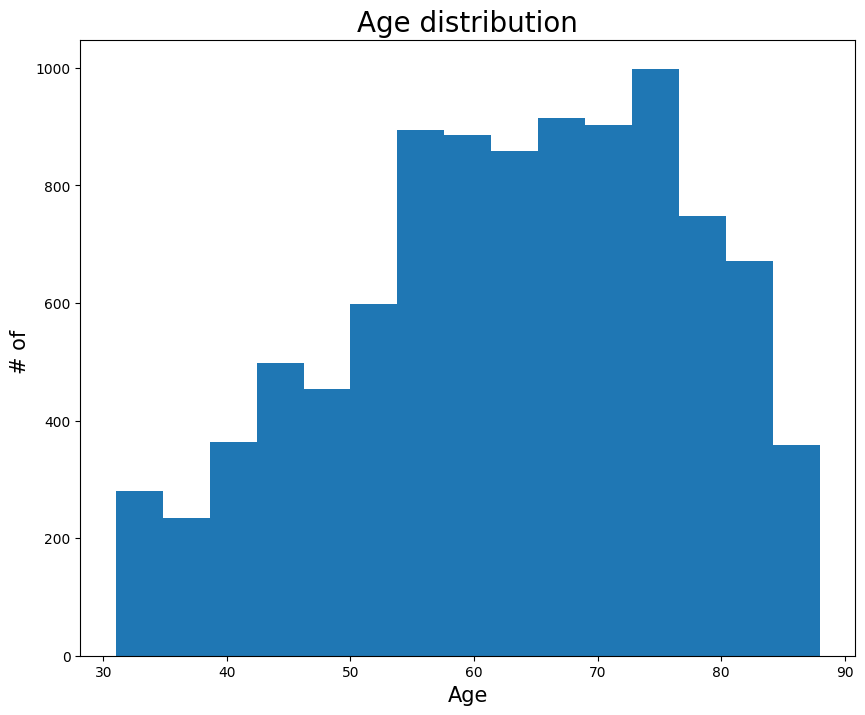

In [69]:
#Age distribution with having cancer data

filter = df[df['Cancer'] == 1]

plt.figure(figsize = (10, 8))
plt.title('Age distribution', fontsize = 20)

plt.hist(filter['AGE'], bins = 15)

plt.xlabel('Age', fontsize = 15)
plt.ylabel('# of ', fontsize = 15)

### It can be seen that cancer occurs more frequently in the older group.

# Drink

In [70]:
df['Type of Drink'].value_counts()

2     4345
99    3960
1      949
3      746
Name: Type of Drink, dtype: int64

In [71]:
# Make a column to show what drink each enjoy

mapping = {1: 'Beer', 2: 'Soju', 3: 'Liquor', 99: 'Others'}
df['Drink_mapped'] = df['Type of Drink'].map(mapping)
df

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,T1,T1a,T1b,T1c,T2,T2a,...,Weight,FEV1_FVC_P,DLCO_VA_P,Operation,Chemotherapy,Radiation Therapy,Death,Survival period,Cancer,Drink_mapped
0,72,1,1,0,0,0,1,0,1,0,...,68.2,87,102,1,0,0,0,157,1,Others
1,66,1,0,0,1,0,0,0,0,0,...,61.1,54,112,0,1,0,0,567,1,Others
2,75,1,1,0,0,0,0,0,0,0,...,73.8,79,73,0,1,0,0,253,1,Liquor
3,77,1,0,1,1,0,1,0,0,0,...,79.1,78,137,0,0,0,0,266,1,Soju
4,85,1,0,0,0,0,0,1,1,1,...,44.3,48,85,1,0,1,0,470,1,Soju
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,69,1,0,0,0,0,1,0,0,0,...,70.4,70,105,0,1,0,1,522,1,Others
9996,37,0,0,0,0,1,0,0,0,0,...,85.0,79,129,1,1,0,0,107,1,Soju
9997,31,1,0,0,0,1,0,0,0,0,...,61.3,69,123,0,0,1,0,66,1,Soju
9998,85,0,0,0,0,0,0,0,0,0,...,54.3,84,68,1,1,0,0,156,0,Beer


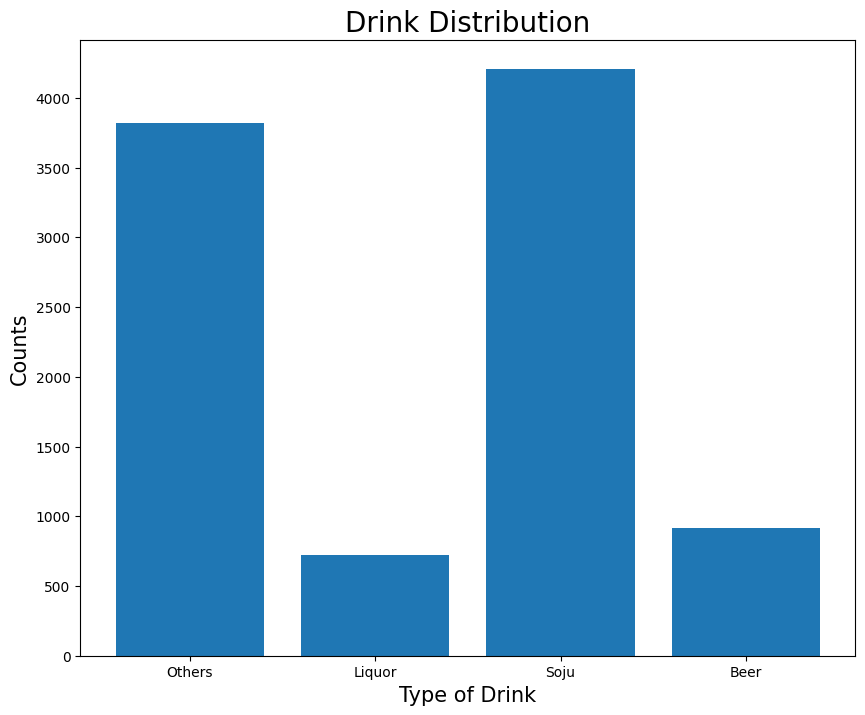

In [72]:
filter = df[df['Cancer'] == 1]

vl = {}
for v in filter['Drink_mapped']:
    if v in vl:
        vl[v] += 1
    else:
        vl[v] = 1

plt.figure(figsize = (10,8))
plt.bar(vl.keys(), vl.values())
plt.title('Drink Distribution', fontsize = 20)
plt.xlabel('Type of Drink', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.show()

# Smoke

In [73]:
# Make a column to show the type of smoking

mapping = {0: 'Not', 1: 'Current', 2: 'Past'}
df['Smoke_mapped'] = df['Smoke'].map(mapping)
df

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,T1,T1a,T1b,T1c,T2,T2a,...,FEV1_FVC_P,DLCO_VA_P,Operation,Chemotherapy,Radiation Therapy,Death,Survival period,Cancer,Drink_mapped,Smoke_mapped
0,72,1,1,0,0,0,1,0,1,0,...,87,102,1,0,0,0,157,1,Others,Past
1,66,1,0,0,1,0,0,0,0,0,...,54,112,0,1,0,0,567,1,Others,Past
2,75,1,1,0,0,0,0,0,0,0,...,79,73,0,1,0,0,253,1,Liquor,Past
3,77,1,0,1,1,0,1,0,0,0,...,78,137,0,0,0,0,266,1,Soju,Past
4,85,1,0,0,0,0,0,1,1,1,...,48,85,1,0,1,0,470,1,Soju,Past
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,69,1,0,0,0,0,1,0,0,0,...,70,105,0,1,0,1,522,1,Others,Current
9996,37,0,0,0,0,1,0,0,0,0,...,79,129,1,1,0,0,107,1,Soju,Current
9997,31,1,0,0,0,1,0,0,0,0,...,69,123,0,0,1,0,66,1,Soju,Past
9998,85,0,0,0,0,0,0,0,0,0,...,84,68,1,1,0,0,156,0,Beer,Past


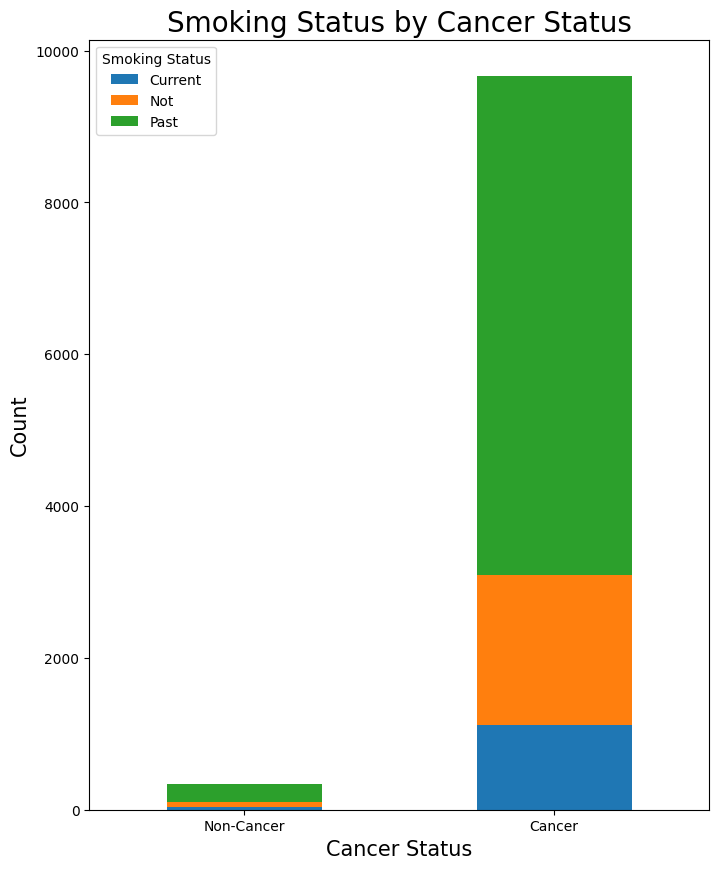

In [74]:
grouped = df.groupby('Cancer')['Smoke_mapped'].value_counts().unstack()

fig, ax = plt.subplots(figsize=(8,10))
grouped.plot(kind='bar', stacked=True, ax=ax)

ax.set_xticklabels(['Non-Cancer', 'Cancer'], rotation=0)

plt.title('Smoking Status by Cancer Status', fontsize = 20)
plt.xlabel('Cancer Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(title='Smoking Status')
plt.show()

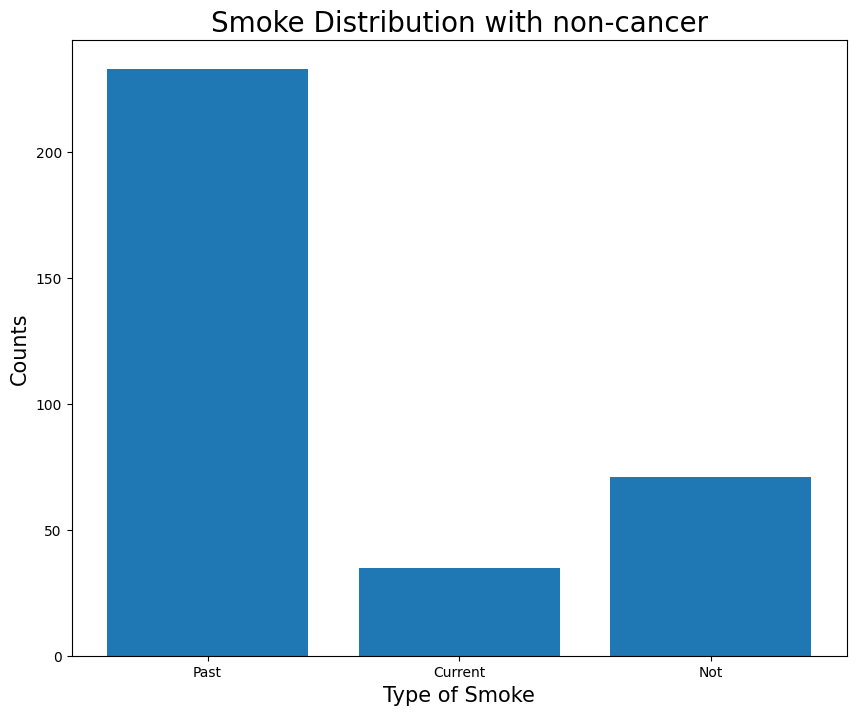

In [75]:
filter = df[df['Cancer'] == 0]

vl = {}
for v in filter['Smoke_mapped']:
    if v in vl:
        vl[v] += 1
    else:
        vl[v] = 1

plt.figure(figsize = (10,8))
plt.bar(vl.keys(), vl.values())
plt.title('Smoke Distribution with non-cancer', fontsize = 20)
plt.xlabel('Type of Smoke', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.show()

In [76]:
from scipy.stats import chi2_contingency

# Create a cross table
cross_table = pd.crosstab(df['Cancer'], df['Smoke_mapped'])

# Test
chi2, p_value, _, _ = chi2_contingency(cross_table)

print("Chi-Square Test")
print("Chi2 Statistic:", chi2)
print("P-value:", p_value)

Chi-Square Test
Chi2 Statistic: 0.46518295576949575
P-value: 0.7924772518881581


In [77]:
# Make a column to show whether each smoke(or smoked) or not.

mapping = {'Not': 'Not', 'Current': 'Smoke', 'Past': 'Smoke'}
df['Smoke_re_mapped'] = df['Smoke_mapped'].map(mapping)
df

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,T1,T1a,T1b,T1c,T2,T2a,...,DLCO_VA_P,Operation,Chemotherapy,Radiation Therapy,Death,Survival period,Cancer,Drink_mapped,Smoke_mapped,Smoke_re_mapped
0,72,1,1,0,0,0,1,0,1,0,...,102,1,0,0,0,157,1,Others,Past,Smoke
1,66,1,0,0,1,0,0,0,0,0,...,112,0,1,0,0,567,1,Others,Past,Smoke
2,75,1,1,0,0,0,0,0,0,0,...,73,0,1,0,0,253,1,Liquor,Past,Smoke
3,77,1,0,1,1,0,1,0,0,0,...,137,0,0,0,0,266,1,Soju,Past,Smoke
4,85,1,0,0,0,0,0,1,1,1,...,85,1,0,1,0,470,1,Soju,Past,Smoke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,69,1,0,0,0,0,1,0,0,0,...,105,0,1,0,1,522,1,Others,Current,Smoke
9996,37,0,0,0,0,1,0,0,0,0,...,129,1,1,0,0,107,1,Soju,Current,Smoke
9997,31,1,0,0,0,1,0,0,0,0,...,123,0,0,1,0,66,1,Soju,Past,Smoke
9998,85,0,0,0,0,0,0,0,0,0,...,68,1,1,0,0,156,0,Beer,Past,Smoke


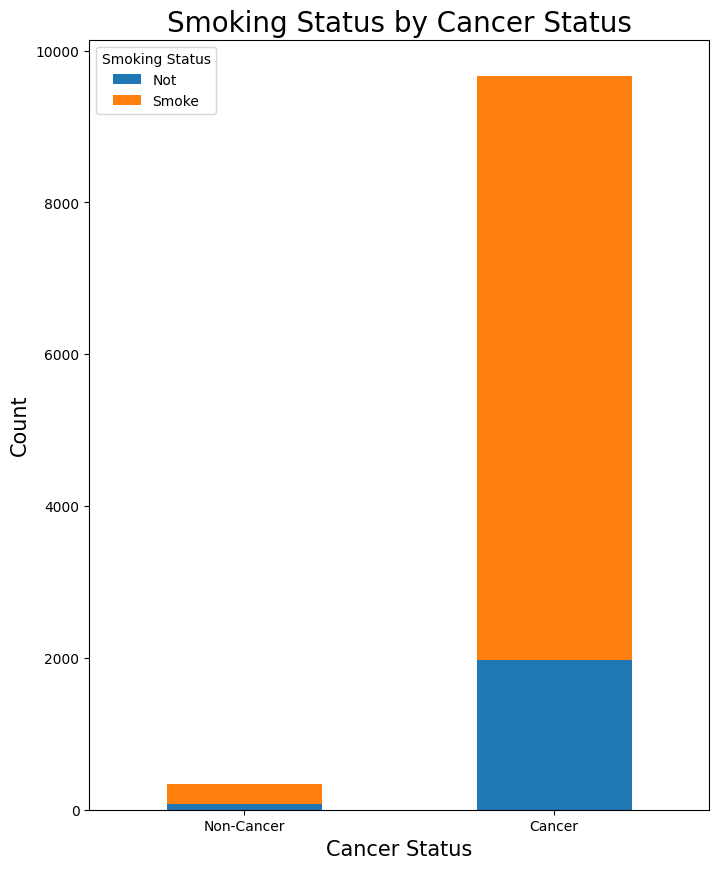

In [78]:
grouped = df.groupby('Cancer')['Smoke_re_mapped'].value_counts().unstack()

fig, ax = plt.subplots(figsize=(8,10))
grouped.plot(kind='bar', stacked=True, ax=ax)

ax.set_xticklabels(['Non-Cancer', 'Cancer'], rotation=0)

plt.title('Smoking Status by Cancer Status', fontsize = 20)
plt.xlabel('Cancer Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(title='Smoking Status')
plt.show()

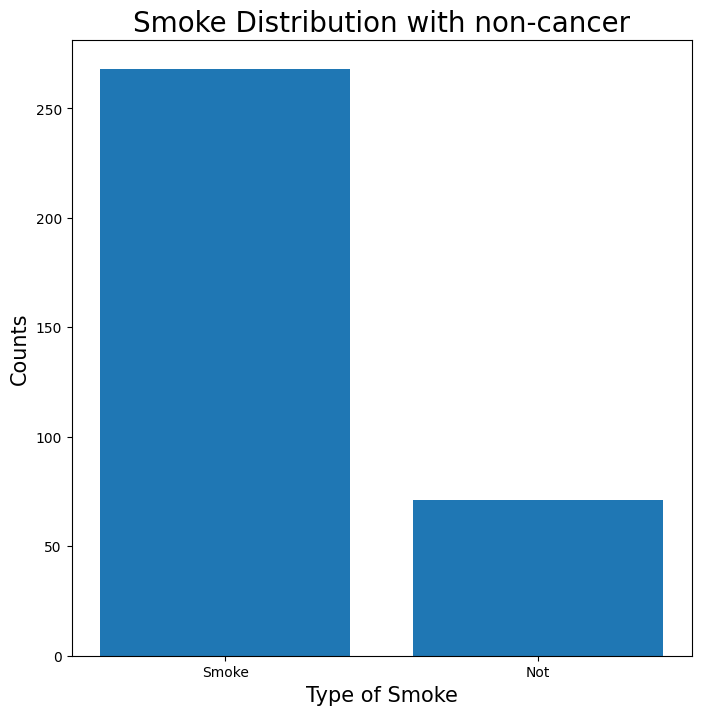

In [79]:
filter = df[df['Cancer'] == 0]

vl = {}
for v in filter['Smoke_re_mapped']:
    if v in vl:
        vl[v] += 1
    else:
        vl[v] = 1

plt.figure(figsize = (8,8))
plt.bar(vl.keys(), vl.values())
plt.title('Smoke Distribution with non-cancer', fontsize = 20)
plt.xlabel('Type of Smoke', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.show()

In [80]:
from scipy.stats import chi2_contingency

# Create a cross table
cross_table = pd.crosstab(df['Cancer'], df['Smoke_re_mapped'])

# Test
chi2, p_value, _, _ = chi2_contingency(cross_table)

print("Chi-Square Test")
print("Chi2 Statistic:", chi2)
print("P-value:", p_value)

Chi-Square Test
Chi2 Statistic: 0.025891115707871854
P-value: 0.8721665190885508


### Since p-value is higher than 0.05, we can know that we cannot ignore the null hypothesis. But this cannot be sured that there's no relationship between Smoking and Lung cancer

# Height, Weight => BMI

In [81]:
# BMI = kg/m2
w = df['Weight']
h = df['Height']
h = h/100
BMI = w / (h**2)
df['BMI'] = BMI
df

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,T1,T1a,T1b,T1c,T2,T2a,...,Operation,Chemotherapy,Radiation Therapy,Death,Survival period,Cancer,Drink_mapped,Smoke_mapped,Smoke_re_mapped,BMI
0,72,1,1,0,0,0,1,0,1,0,...,1,0,0,0,157,1,Others,Past,Smoke,33.822654
1,66,1,0,0,1,0,0,0,0,0,...,0,1,0,0,567,1,Others,Past,Smoke,18.984376
2,75,1,1,0,0,0,0,0,0,0,...,0,1,0,0,253,1,Liquor,Past,Smoke,25.596524
3,77,1,0,1,1,0,1,0,0,0,...,0,0,0,0,266,1,Soju,Past,Smoke,31.486033
4,85,1,0,0,0,0,0,1,1,1,...,1,0,1,0,470,1,Soju,Past,Smoke,14.922211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,69,1,0,0,0,0,1,0,0,0,...,0,1,0,1,522,1,Others,Current,Smoke,26.991536
9996,37,0,0,0,0,1,0,0,0,0,...,1,1,0,0,107,1,Soju,Current,Smoke,30.958072
9997,31,1,0,0,0,1,0,0,0,0,...,0,0,1,0,66,1,Soju,Past,Smoke,26.707621
9998,85,0,0,0,0,0,0,0,0,0,...,1,1,0,0,156,0,Beer,Past,Smoke,21.344130


In [82]:
bmi_cancer = df.loc[df.Cancer == 1, 'BMI'].reset_index(drop = True)
bmi_non_cancer = df.loc[df.Cancer == 0, 'BMI'].reset_index(drop = True)

In [83]:
bmi_cancer.describe()

count    9661.000000
mean       24.794756
std         5.932090
min        10.705034
25%        20.335336
50%        24.321388
75%        28.645765
max        51.324349
Name: BMI, dtype: float64

In [84]:
bmi_non_cancer.describe()

count    339.000000
mean      25.597445
std        5.837724
min       12.759637
25%       21.505459
50%       25.123719
75%       28.976452
max       43.027960
Name: BMI, dtype: float64

Text(0, 0.5, '# of ')

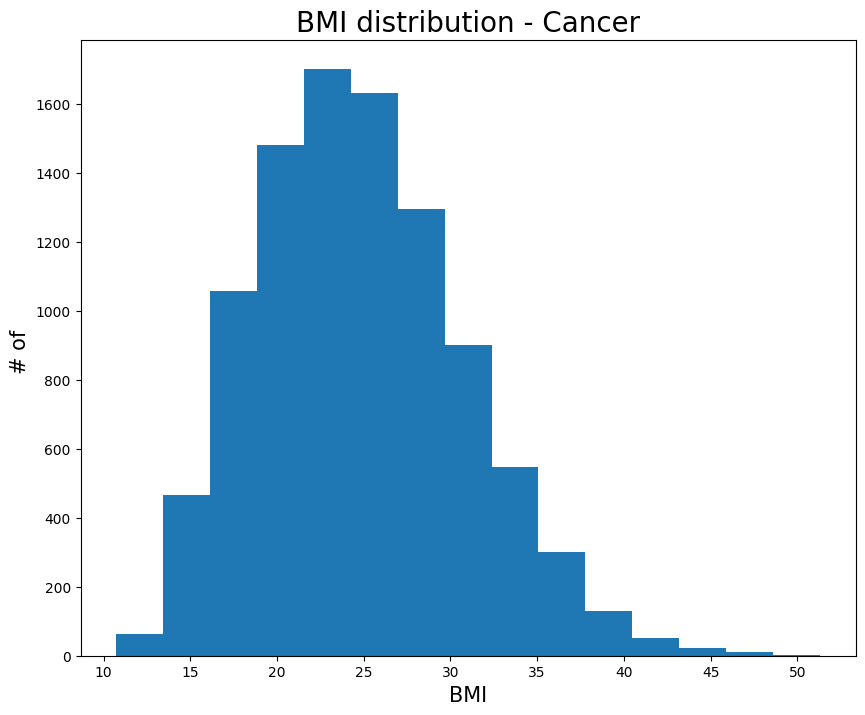

In [85]:
#BMI distribution with having cancer data
plt.figure(figsize = (10, 8))
plt.title('BMI distribution - Cancer', fontsize = 20)

plt.hist(bmi_cancer, bins = 15)

plt.xlabel('BMI', fontsize = 15)
plt.ylabel('# of ', fontsize = 15)

Text(0, 0.5, '# of ')

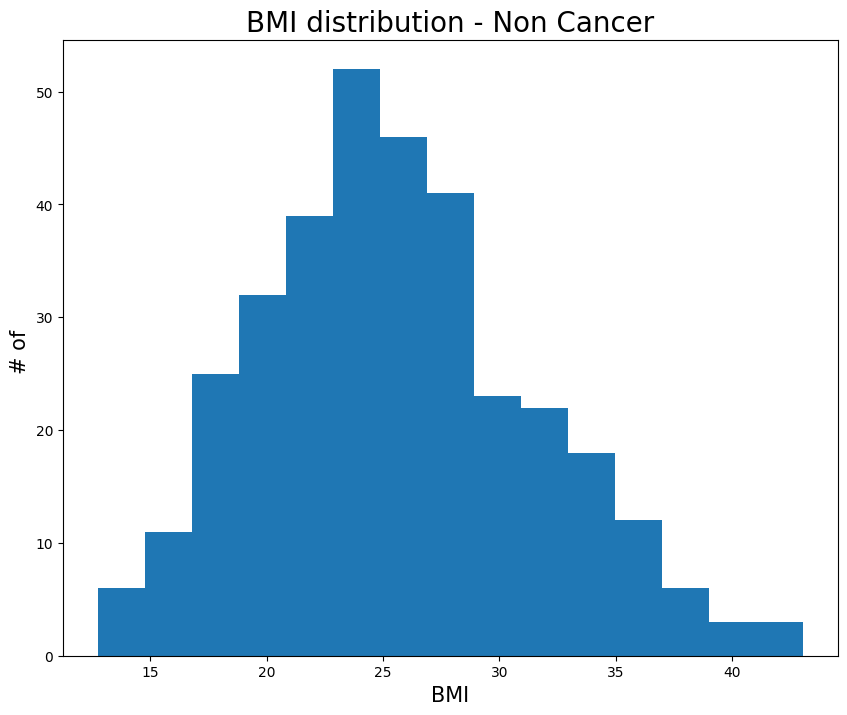

In [86]:
#BMI distribution with having cancer data
plt.figure(figsize = (10, 8))
plt.title('BMI distribution - Non Cancer', fontsize = 20)

plt.hist(bmi_non_cancer, bins = 15)

plt.xlabel('BMI', fontsize = 15)
plt.ylabel('# of ', fontsize = 15)

<Axes: title={'center': 'BMI distribution'}, xlabel='Cancer', ylabel='BMI'>

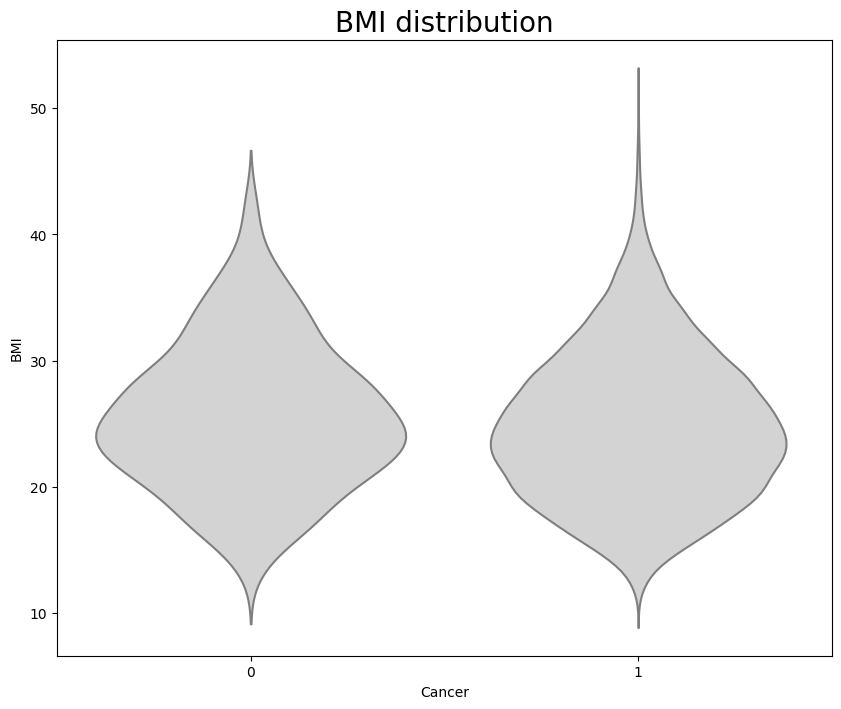

In [87]:
plt.figure(figsize = (10,8))
plt.title('BMI distribution', fontsize = 20)
sns.violinplot(x = 'Cancer', y = 'BMI', data = df, inner = None, color = 'lightgray')
#sns.stripplot(x = 'Cancer', y = 'BMI', data = df, size = 2, jitter = True)

In [88]:
BMI_mapped = []
for i in range(0, len(df)):
  if df.iloc[i]['BMI'] < 18.5:
    BMI_mapped.append(0)
  elif df.iloc[i]['BMI'] >= 18.5 and df.iloc[i]['BMI'] < 23.0:
    BMI_mapped.append(1)
  elif df.iloc[i]['BMI'] >= 23.0:
    BMI_mapped.append(2)

df['BMI_mapped'] = BMI_mapped
df

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,T1,T1a,T1b,T1c,T2,T2a,...,Chemotherapy,Radiation Therapy,Death,Survival period,Cancer,Drink_mapped,Smoke_mapped,Smoke_re_mapped,BMI,BMI_mapped
0,72,1,1,0,0,0,1,0,1,0,...,0,0,0,157,1,Others,Past,Smoke,33.822654,2
1,66,1,0,0,1,0,0,0,0,0,...,1,0,0,567,1,Others,Past,Smoke,18.984376,1
2,75,1,1,0,0,0,0,0,0,0,...,1,0,0,253,1,Liquor,Past,Smoke,25.596524,2
3,77,1,0,1,1,0,1,0,0,0,...,0,0,0,266,1,Soju,Past,Smoke,31.486033,2
4,85,1,0,0,0,0,0,1,1,1,...,0,1,0,470,1,Soju,Past,Smoke,14.922211,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,69,1,0,0,0,0,1,0,0,0,...,1,0,1,522,1,Others,Current,Smoke,26.991536,2
9996,37,0,0,0,0,1,0,0,0,0,...,1,0,0,107,1,Soju,Current,Smoke,30.958072,2
9997,31,1,0,0,0,1,0,0,0,0,...,0,1,0,66,1,Soju,Past,Smoke,26.707621,2
9998,85,0,0,0,0,0,0,0,0,0,...,1,0,0,156,0,Beer,Past,Smoke,21.344130,1


In [89]:
contingency_table = pd.crosstab(df['BMI_mapped'], df['Cancer'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 6.74422748628143
p-value: 0.034317023254228904


In [90]:
from scipy import stats

cancer_0 = df[df['Cancer'] == 0]['BMI_mapped']
cancer_1 = df[df['Cancer'] == 1]['BMI_mapped']

t_stat, p_value = stats.ttest_ind(cancer_0, cancer_1)
print("T-statistic:", t_stat)
print("p-value:", p_value)

T-statistic: 2.5632288941538324
p-value: 0.010384863000403453


# Test Result

### FEV1/FVC

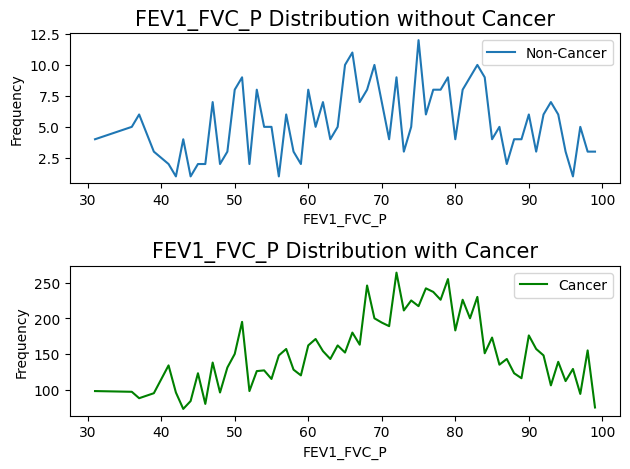

In [91]:
filter0 = df[df['Cancer'] == 0]
filter1 = df[df['Cancer'] == 1]


# calculate frequency
vl0 = filter0['FEV1_FVC_P'].value_counts().sort_index()
vl1 = filter1['FEV1_FVC_P'].value_counts().sort_index()


plt.subplot(2,1,1)
plt.plot(vl0.index, vl0.values, label='Non-Cancer')
plt.xlabel('FEV1_FVC_P', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.title('FEV1_FVC_P Distribution without Cancer', fontsize = 15)
plt.legend()

plt.subplot(2,1,2)
plt.plot(vl1.index, vl1.values, label='Cancer', color = 'green')
plt.xlabel('FEV1_FVC_P',fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.title('FEV1_FVC_P Distribution with Cancer', fontsize = 15)
plt.legend()

plt.tight_layout()
plt.show()

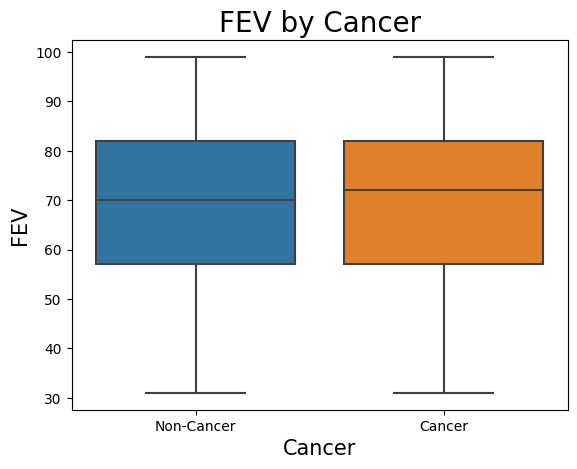

In [92]:
sns.boxplot(data=df, x='Cancer', y='FEV1_FVC_P')
plt.title('FEV by Cancer', fontsize = 20)
plt.xlabel('Cancer', fontsize = 15)
plt.ylabel('FEV', fontsize = 15)
plt.xticks([0, 1], ['Non-Cancer', 'Cancer'])
plt.show()

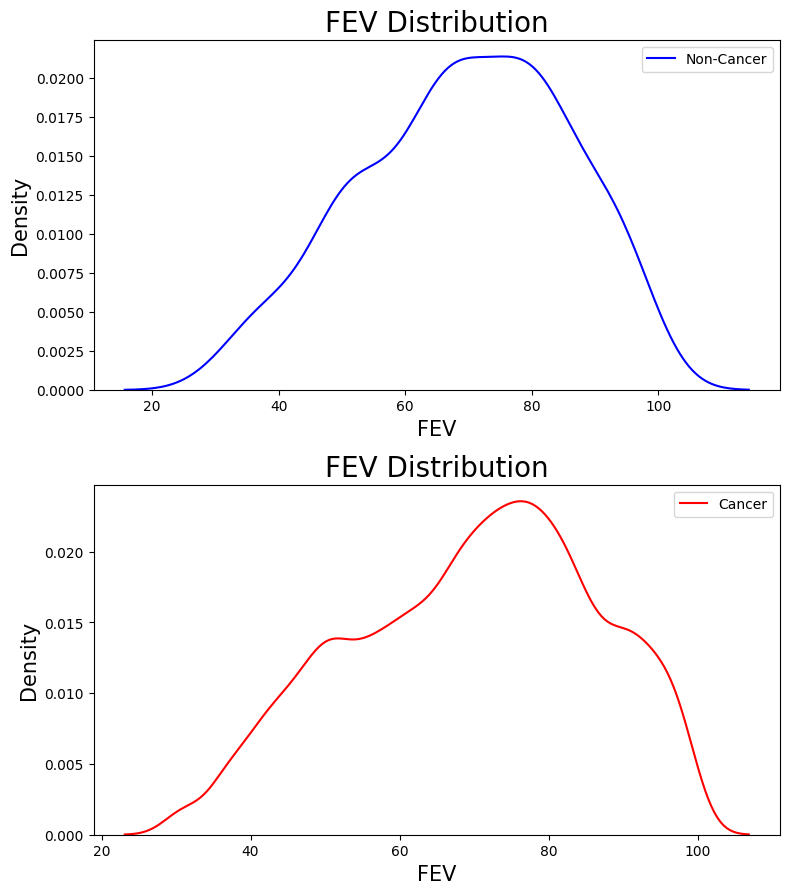

In [93]:
plt.figure(figsize = (8,13))

for i in range(0,2):
    plt.subplot(3,1,i+1)
    group = df[df['Cancer'] == i]['FEV1_FVC_P']

    if i == 0:
        sns.kdeplot(group, label = 'Non-Cancer', color = 'blue')
    else:
        sns.kdeplot(group, label = 'Cancer', color = 'red')

    plt.title('FEV Distribution', fontsize = 20)
    plt.xlabel('FEV', fontsize = 15)
    plt.ylabel('Density', fontsize = 15)
    plt.legend()
plt.tight_layout()
plt.show()

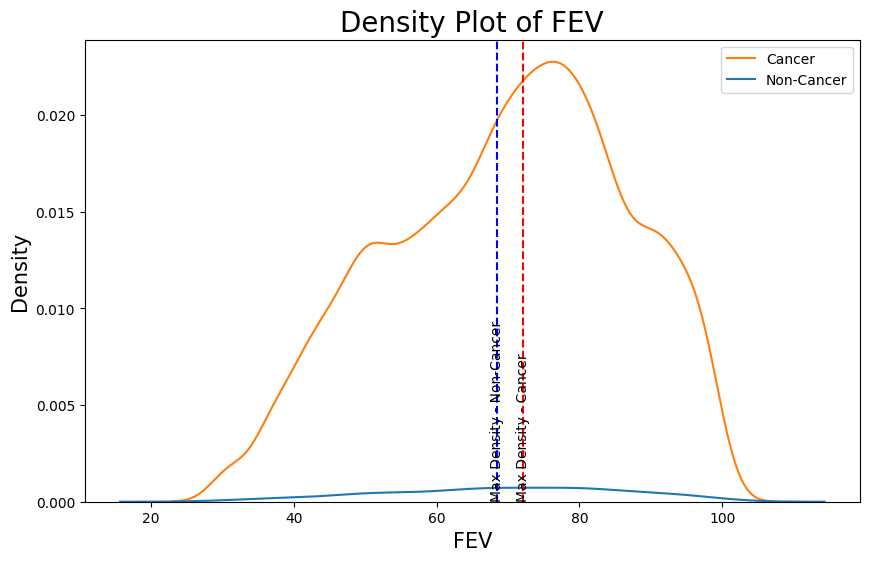

In [94]:
#density plot
plt.figure(figsize = (10,6))
sns.kdeplot(data = df, x = 'FEV1_FVC_P', hue = 'Cancer')
plt.title('Density Plot of FEV', fontsize = 20)
plt.xlabel('FEV', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.legend(('Cancer', 'Non-Cancer'))


# calculate density
density_values = []
for group, data in df.groupby('Cancer'):
    density, fev = np.histogram(data['FEV1_FVC_P'], bins='auto', density=True)
    max_density_index = np.argmax(density)
    max_density_fev = (fev[max_density_index] + fev[max_density_index+1]) / 2
    density_values.append((group, max_density_fev))

# express the highest density point
for group, fev in density_values:
    if group == 0:
        plt.axvline(x = fev, color = 'blue', linestyle = '--')
        plt.text(fev, 0, f'Max Density - Non-Cancer', rotation=90, va='bottom', ha='center')
    else:
        plt.axvline(x = fev, color = 'red', linestyle = '--')
        plt.text(fev, 0, f'Max Density - Cancer', rotation=90, va='bottom', ha='center')


plt.show()

### Since normal range of FEV1/FVC is 70-80, we decided to consider only below 70 data. Under 70 means his/her lung function decreased

In [95]:
FEV_filter = df[df['FEV1_FVC_P'] < 70]
FEV_cancer = FEV_filter[FEV_filter['Cancer'] == 1].reset_index(drop = True)
FEV_noncancer = FEV_filter[FEV_filter['Cancer'] == 0].reset_index(drop = True)
print("Cancer:")
print(FEV_cancer['FEV1_FVC_P'].describe(), '\n')
print("Non-Cancer")
print(FEV_noncancer['FEV1_FVC_P'].describe())

Cancer:
count    4430.000000
mean       54.855079
std         9.943200
min        31.000000
25%        48.000000
50%        56.000000
75%        63.000000
max        69.000000
Name: FEV1_FVC_P, dtype: float64 

Non-Cancer
count    166.000000
mean      55.596386
std       10.314438
min       31.000000
25%       49.250000
50%       57.000000
75%       65.000000
max       69.000000
Name: FEV1_FVC_P, dtype: float64


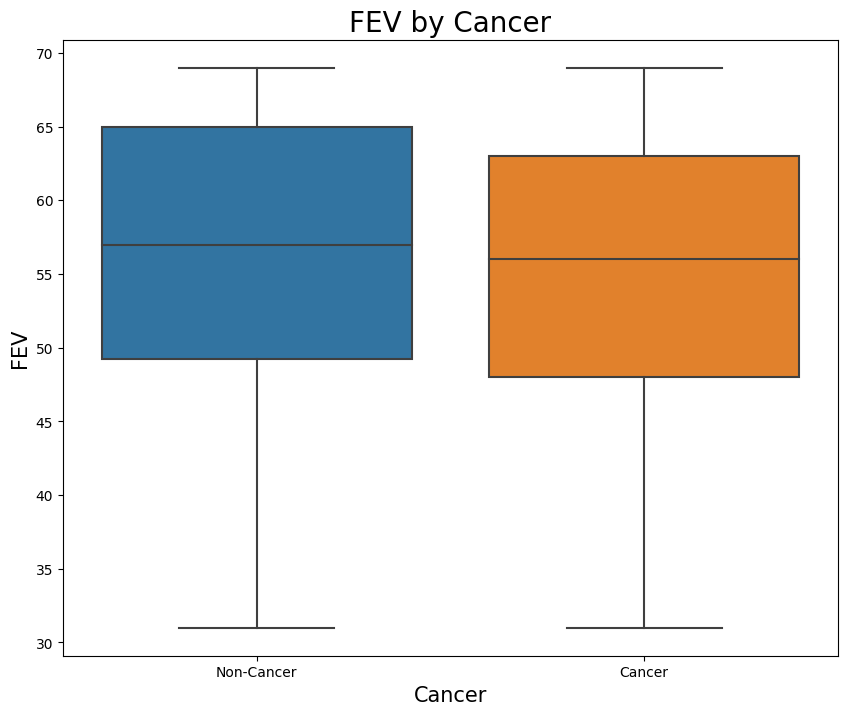

In [96]:
plt.figure(figsize = (10,8))
sns.boxplot(data=FEV_filter, x='Cancer', y='FEV1_FVC_P')
plt.title('FEV by Cancer', fontsize = 20)
plt.xlabel('Cancer', fontsize = 15)
plt.ylabel('FEV', fontsize = 15)
plt.xticks([0, 1], ['Non-Cancer', 'Cancer'])
plt.show()

In [97]:
f = []
for i in range(0,len(df)):
    if df['FEV1_FVC_P'].iloc[i] < 70:
        f.append(1)
    else:
        f.append(0)

df['FEV_filter'] = f
df

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,T1,T1a,T1b,T1c,T2,T2a,...,Radiation Therapy,Death,Survival period,Cancer,Drink_mapped,Smoke_mapped,Smoke_re_mapped,BMI,BMI_mapped,FEV_filter
0,72,1,1,0,0,0,1,0,1,0,...,0,0,157,1,Others,Past,Smoke,33.822654,2,0
1,66,1,0,0,1,0,0,0,0,0,...,0,0,567,1,Others,Past,Smoke,18.984376,1,1
2,75,1,1,0,0,0,0,0,0,0,...,0,0,253,1,Liquor,Past,Smoke,25.596524,2,0
3,77,1,0,1,1,0,1,0,0,0,...,0,0,266,1,Soju,Past,Smoke,31.486033,2,0
4,85,1,0,0,0,0,0,1,1,1,...,1,0,470,1,Soju,Past,Smoke,14.922211,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,69,1,0,0,0,0,1,0,0,0,...,0,1,522,1,Others,Current,Smoke,26.991536,2,0
9996,37,0,0,0,0,1,0,0,0,0,...,0,0,107,1,Soju,Current,Smoke,30.958072,2,0
9997,31,1,0,0,0,1,0,0,0,0,...,1,0,66,1,Soju,Past,Smoke,26.707621,2,1
9998,85,0,0,0,0,0,0,0,0,0,...,0,0,156,0,Beer,Past,Smoke,21.344130,1,0


### If we consider only under 70 data, we can say that cancer and FEV1/FVC is quite related to Cancer occurance.

### DLCO

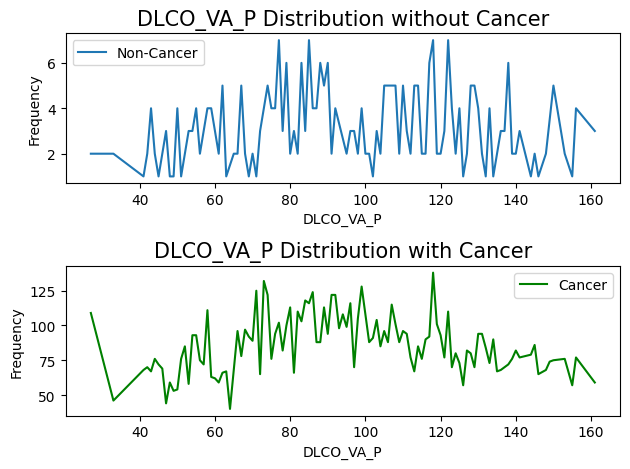

In [98]:
filter0 = df[df['Cancer'] == 0]
filter1 = df[df['Cancer'] == 1]


# calculate frequency
vl0 = filter0['DLCO_VA_P'].value_counts().sort_index()
vl1 = filter1['DLCO_VA_P'].value_counts().sort_index()


plt.subplot(2,1,1)
plt.plot(vl0.index, vl0.values, label='Non-Cancer')
plt.xlabel('DLCO_VA_P', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.title('DLCO_VA_P Distribution without Cancer', fontsize = 15)
plt.legend()

plt.subplot(2,1,2)
plt.plot(vl1.index, vl1.values, label='Cancer', color = 'green')
plt.xlabel('DLCO_VA_P', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.title('DLCO_VA_P Distribution with Cancer', fontsize = 15)
plt.legend()

plt.tight_layout()
plt.show()

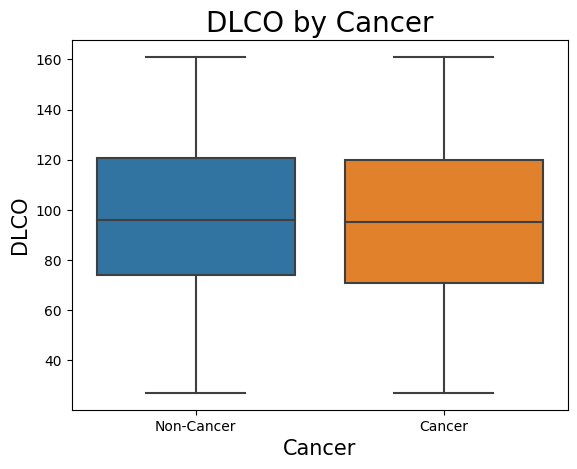

In [99]:
sns.boxplot(data=df, x='Cancer', y='DLCO_VA_P')
plt.title('DLCO by Cancer', fontsize = 20)
plt.xlabel('Cancer', fontsize = 15)
plt.ylabel('DLCO', fontsize = 15)
plt.xticks([0, 1], ['Non-Cancer', 'Cancer'])
plt.show()

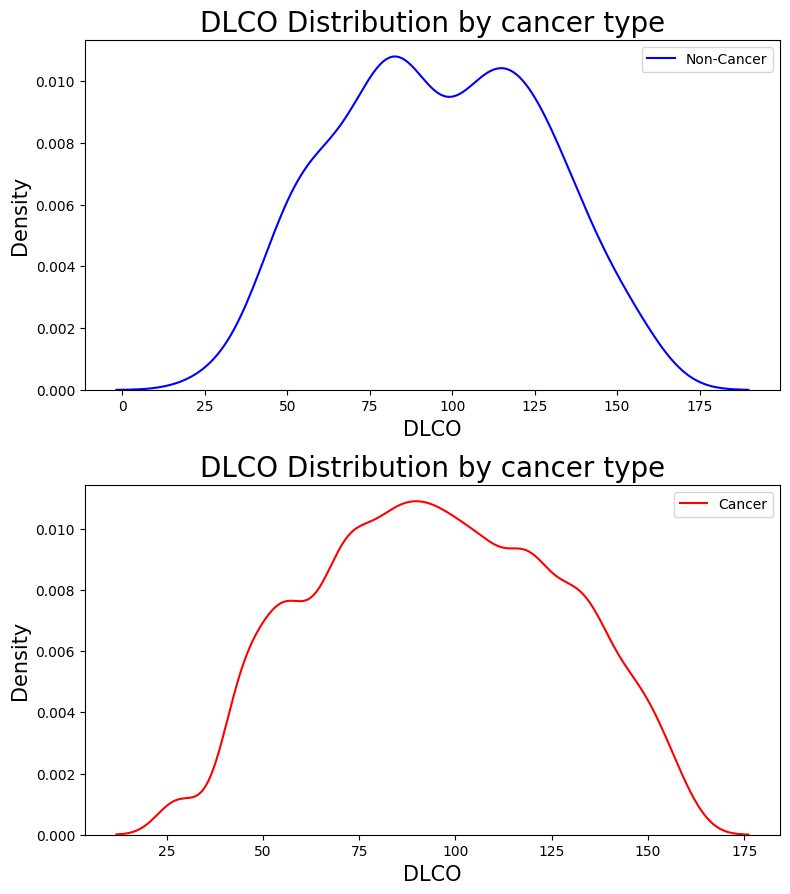

In [100]:
plt.figure(figsize = (8,13))

for i in range(0,2):
    plt.subplot(3,1,i+1)
    group = df[df['Cancer'] == i]['DLCO_VA_P']

    if i == 0:
        sns.kdeplot(group, label = 'Non-Cancer', color = 'blue')
    else:
        sns.kdeplot(group, label = 'Cancer', color = 'red')

    plt.title('DLCO Distribution by cancer type', fontsize = 20)
    plt.xlabel('DLCO', fontsize = 15)
    plt.ylabel('Density', fontsize = 15)
    plt.legend()
plt.tight_layout()
plt.show()

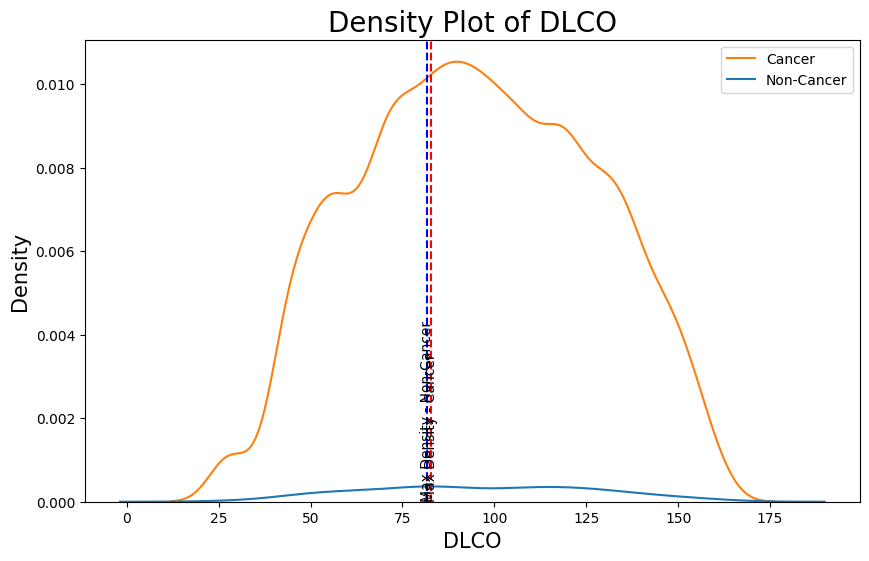

In [101]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='DLCO_VA_P', hue='Cancer')
plt.title('Density Plot of DLCO', fontsize=20)
plt.xlabel('DLCO', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend(('Cancer', 'Non-Cancer'))

# Calculate density
density_values = []
for group, data in df.groupby('Cancer'):
    density, dlco = np.histogram(data['DLCO_VA_P'], bins='auto', density=True)
    max_density_index = np.argmax(density)
    max_density_dlco = (dlco[max_density_index] + dlco[max_density_index + 1]) / 2
    density_values.append((group, max_density_dlco))

# Express the highest density point
for group, dlco in density_values:
    if group == 0:
        plt.axvline(x = dlco, color = 'blue', linestyle = '--')
        plt.text(dlco, 0, f'Max Density - Non-Cancer', rotation=90, va='bottom', ha='center')
    else:
        plt.axvline(x = dlco, color = 'red', linestyle = '--')
        plt.text(dlco, 0, f'Max Density - Cancer', rotation=90, va='bottom', ha='center')

plt.show()

### Since normal range of DLCO is 80-120, we decided to consider only below 80 data. Under 80 means his/her lung function decreased

In [102]:
DLCO_filter = df[df['DLCO_VA_P'] < 80]
DLCO_cancer = DLCO_filter[DLCO_filter['Cancer'] == 1].reset_index(drop = True)
DLCO_noncancer = DLCO_filter[DLCO_filter['Cancer'] == 0].reset_index(drop = True)
print("Cancer:")
print(DLCO_cancer['DLCO_VA_P'].describe(), '\n')
print("Non-Cancer")
print(DLCO_noncancer['DLCO_VA_P'].describe())

Cancer:
count    3225.000000
mean       60.016124
std        13.124418
min        27.000000
25%        51.000000
50%        61.000000
75%        71.000000
max        79.000000
Name: DLCO_VA_P, dtype: float64 

Non-Cancer
count    113.000000
mean      61.451327
std       12.889635
min       27.000000
25%       53.000000
50%       62.000000
75%       74.000000
max       79.000000
Name: DLCO_VA_P, dtype: float64


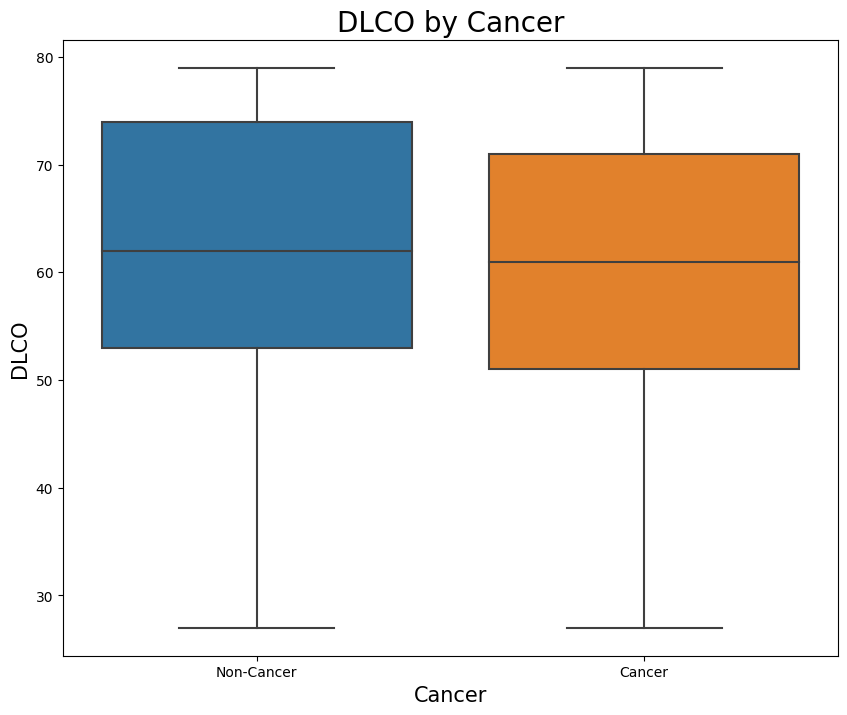

In [103]:
plt.figure(figsize = (10,8))
sns.boxplot(data=DLCO_filter, x='Cancer', y='DLCO_VA_P')
plt.title('DLCO by Cancer', fontsize = 20)
plt.xlabel('Cancer', fontsize = 15)
plt.ylabel('DLCO', fontsize = 15)
plt.xticks([0, 1], ['Non-Cancer', 'Cancer'])
plt.show()

In [104]:
d = []
for i in range(0, len(df)):
    if df['DLCO_VA_P'].iloc[i] < 80:
        d.append(1)
    else:
        d.append(0)

df['FEV_filter'] = f
df['DLCO_filter'] = d
df

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,T1,T1a,T1b,T1c,T2,T2a,...,Death,Survival period,Cancer,Drink_mapped,Smoke_mapped,Smoke_re_mapped,BMI,BMI_mapped,FEV_filter,DLCO_filter
0,72,1,1,0,0,0,1,0,1,0,...,0,157,1,Others,Past,Smoke,33.822654,2,0,0
1,66,1,0,0,1,0,0,0,0,0,...,0,567,1,Others,Past,Smoke,18.984376,1,1,0
2,75,1,1,0,0,0,0,0,0,0,...,0,253,1,Liquor,Past,Smoke,25.596524,2,0,1
3,77,1,0,1,1,0,1,0,0,0,...,0,266,1,Soju,Past,Smoke,31.486033,2,0,0
4,85,1,0,0,0,0,0,1,1,1,...,0,470,1,Soju,Past,Smoke,14.922211,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,69,1,0,0,0,0,1,0,0,0,...,1,522,1,Others,Current,Smoke,26.991536,2,0,0
9996,37,0,0,0,0,1,0,0,0,0,...,0,107,1,Soju,Current,Smoke,30.958072,2,0,0
9997,31,1,0,0,0,1,0,0,0,0,...,0,66,1,Soju,Past,Smoke,26.707621,2,1,0
9998,85,0,0,0,0,0,0,0,0,0,...,0,156,0,Beer,Past,Smoke,21.344130,1,0,1


### We can say that cancer and DLCO is quite related to Cancer occurance in both cases.

# Smoking - Test result

In [105]:
mapping = {'Not': 0, 'Smoke' : 1}
df['Smoke_re_int_mapped'] = df['Smoke_re_mapped'].map(mapping)
df

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,T1,T1a,T1b,T1c,T2,T2a,...,Survival period,Cancer,Drink_mapped,Smoke_mapped,Smoke_re_mapped,BMI,BMI_mapped,FEV_filter,DLCO_filter,Smoke_re_int_mapped
0,72,1,1,0,0,0,1,0,1,0,...,157,1,Others,Past,Smoke,33.822654,2,0,0,1
1,66,1,0,0,1,0,0,0,0,0,...,567,1,Others,Past,Smoke,18.984376,1,1,0,1
2,75,1,1,0,0,0,0,0,0,0,...,253,1,Liquor,Past,Smoke,25.596524,2,0,1,1
3,77,1,0,1,1,0,1,0,0,0,...,266,1,Soju,Past,Smoke,31.486033,2,0,0,1
4,85,1,0,0,0,0,0,1,1,1,...,470,1,Soju,Past,Smoke,14.922211,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,69,1,0,0,0,0,1,0,0,0,...,522,1,Others,Current,Smoke,26.991536,2,0,0,1
9996,37,0,0,0,0,1,0,0,0,0,...,107,1,Soju,Current,Smoke,30.958072,2,0,0,1
9997,31,1,0,0,0,1,0,0,0,0,...,66,1,Soju,Past,Smoke,26.707621,2,1,0,1
9998,85,0,0,0,0,0,0,0,0,0,...,156,0,Beer,Past,Smoke,21.344130,1,0,1,1


In [106]:
# Create a cross table
cross_table = pd.crosstab(df['FEV_filter'], df['Smoke_re_int_mapped'])
# Test
chi2, p_value, _, _ = chi2_contingency(cross_table)

print("Chi2 Statistic:", chi2)
print("P-value:", p_value)

Chi2 Statistic: 3.139859409077576
P-value: 0.07640039317570867


In [107]:
# Create a cross table
cross_table = pd.crosstab(df['DLCO_filter'], df['Smoke_re_int_mapped'])
# Test
chi2, p_value, _, _ = chi2_contingency(cross_table)

print("Chi2 Statistic:", chi2)
print("P-value:", p_value)

Chi2 Statistic: 0.0021357641537537754
P-value: 0.9631394222283008


# Death

### Since we are looking at lung cancer, we removed data for people without cancer when looking for death information.

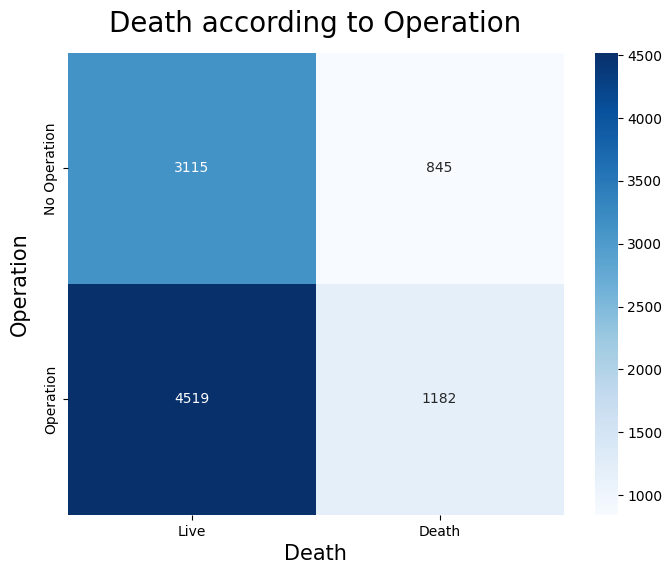

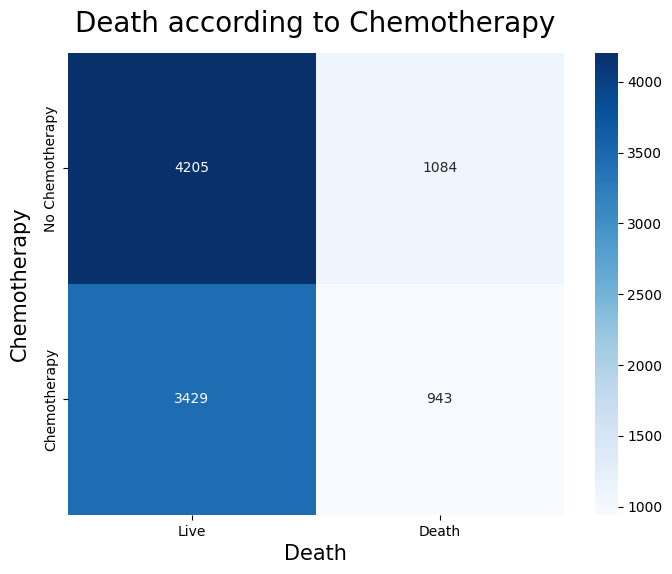

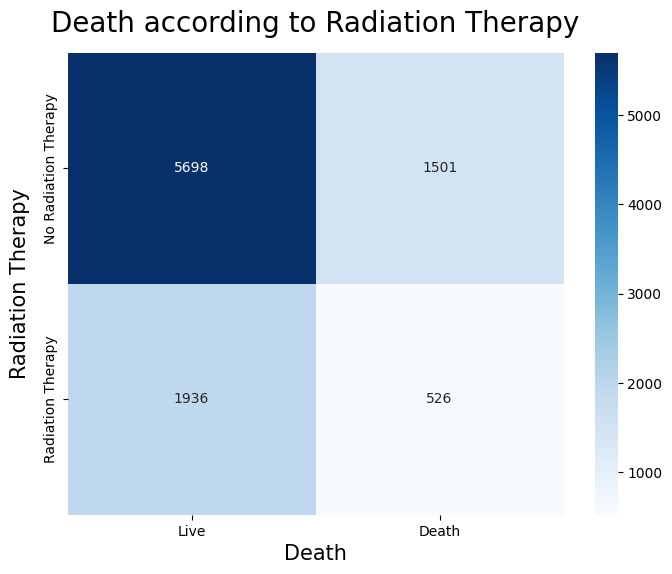

In [108]:
filter = df[df['Cancer'] == 1]
var = ['Operation', 'Chemotherapy', 'Radiation Therapy']

for v in var:
    plt.figure(figsize = (8,6))
    cross_tab = pd.crosstab(filter[v], filter['Death'])
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Death according to {v}', fontsize = 20, pad = 15)
    plt.xlabel('Death', fontsize = 15)
    plt.ylabel(f'{v}', fontsize = 15, labelpad = 10)
    xticklabels = ['Live', 'Death']
    yticklabels = [f'No {v}', f'{v}']
    plt.xticks(ticks=[0.5,1.5], labels=xticklabels)
    plt.yticks(ticks=[0.5, 1.5], labels=yticklabels)
    plt.show()

In [109]:
filter = df[df['Cancer'] == 1]
var = ['Operation', 'Chemotherapy', 'Radiation Therapy']

for v in var:
    plt.figure(figsize = (8,6))
    cross_tab = pd.crosstab(filter[v], filter['Death'])
    no_treatment = cross_tab[0][0] / (cross_tab[0][0] + cross_tab[0][1])
    treatment = cross_tab[1][0] / (cross_tab[1][0] + cross_tab[1][1])
    if no_treatment > treatment:
      print(f'For {v}, no treament is higher than treatment')
    else:
      print(f'For {v}, treatment is higher than no treatment')

For Operation, treatment is higher than no treatment
For Chemotherapy, no treament is higher than treatment
For Radiation Therapy, no treament is higher than treatment


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

# Survival Period

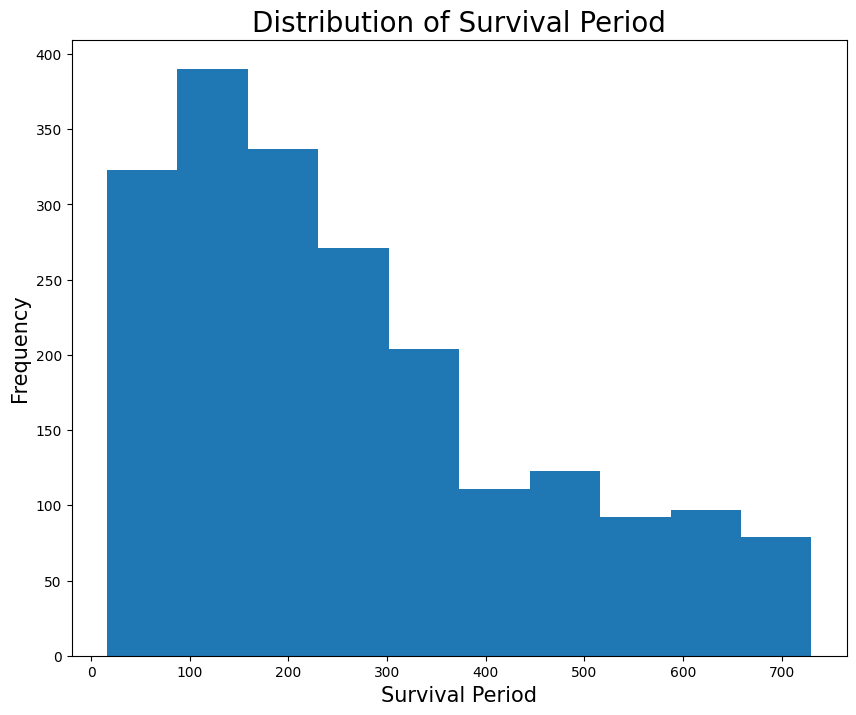

In [110]:
# Distribution of Survival period

filter = df[(df['Cancer'] == 1) & (df['Death'] == 1)]
plt.figure(figsize = (10,8))
plt.hist(filter['Survival period'], bins=10)  # 구간 개수는 적절하게 조정 가능
plt.title('Distribution of Survival Period', fontsize = 20)
plt.xlabel('Survival Period', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

In [111]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


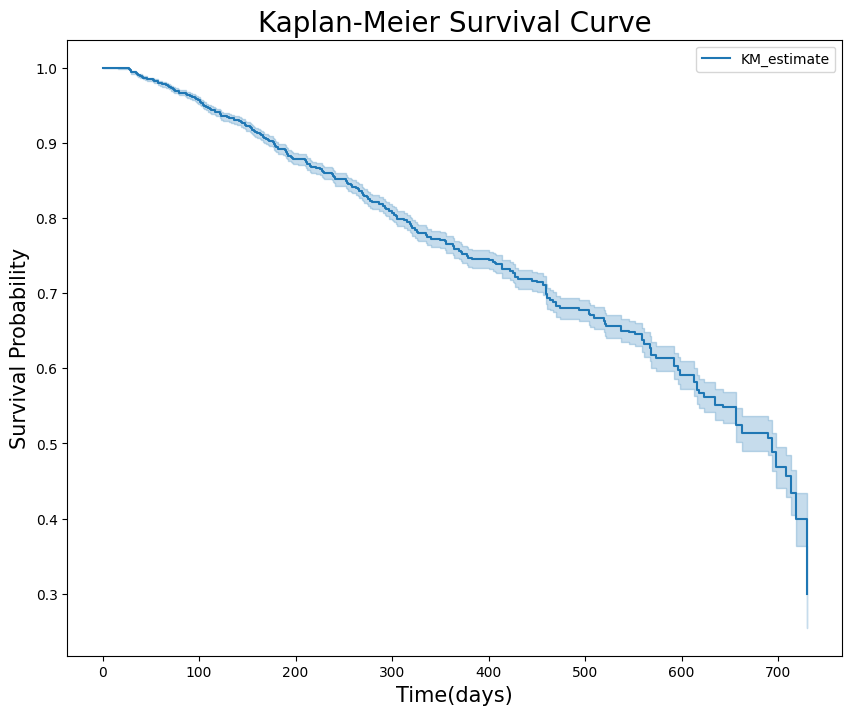

In [112]:
from lifelines import KaplanMeierFitter

filter = df[df['Cancer'] == 1]
time = filter['Survival period']
event = filter['Death']

# Kaplan-Meier survival curve
plt.figure(figsize = (10,8))
kmf = KaplanMeierFitter()
kmf.fit(time, event)
kmf.plot()
plt.title('Kaplan-Meier Survival Curve', fontsize = 20)
plt.xlabel('Time(days)', fontsize = 15)
plt.ylabel('Survival Probability', fontsize = 15)
plt.show()

### *Conclusion of EDA
1. It seemed to be true
2. It cannot be said to be true, but it is difficult to judge that it is false because only linear relationships are analyzed.
3. It also cannot be siad to be true since p-value is higher than .05
4. Only Radiation seemed to help survive